In [1]:
import numpy as np
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
from keras.regularizers import Regularizer
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
lambda_val = 1e-03

In [0]:
def kl_divergence(kl_term, p, p_hat) :
    p_hat_term = p * K.log(1e-10 + p_hat) + (1 - p) * K.log(1e-10 + 1.0 - p_hat)
        
    return kl_term - p_hat_term

In [0]:
class SparseActivityRegularizer(Regularizer) :
    
    def __init__(self, p=0.05, beta=3.0) :
        self.p = K.cast_to_floatx(p)
        self.beta = K.cast_to_floatx(beta)
        self.kl_term = p * K.log(p) + (1.0 - p) * K.log(1.0 - p)
        
    def __call__(self, x) :
        p_hat = K.mean(x, axis=0)
        reg = self.beta * K.sum(kl_divergence(self.kl_term,
                                               self.p, p_hat))
        
        return reg
    
    def get_config(self) :
        return {
            "name": self.__class__.__name___,
            "p": float(self.p),
            "beta": float(self.beta)
        }

In [5]:
sparse_reg = SparseActivityRegularizer()

In [6]:
encoding_dim = 32

input_img = Input(shape=(784, ))

encoded = Dense(encoding_dim, 
                activation='relu',
                kernel_regularizer=regularizers.l2(lambda_val),
                activity_regularizer=sparse_reg)(input_img)

decoded = Dense(784, 
                activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim, ))
decoded_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoded_layer(encoded_input))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1 :])))

x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1 :])))


11493376/11490434 [==============================] - 2s 0us/step





Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 6s 101us/step - loss: 0.9177 - val_loss: 0.8968
Epoch 2/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.6211 - val_loss: 0.8186
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.5405 - val_loss: 0.7954
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.4937 - val_loss: 0.7227
Epoch 5/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.4506 - val_loss: 0.7444
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4342 - val_loss: 0.7523
Epoch 7/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.4146 - val_loss: 0.7689
Epoch 8/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3996 - val_loss: 0.7662
Epoch 9/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3859 - val_loss: 0.7

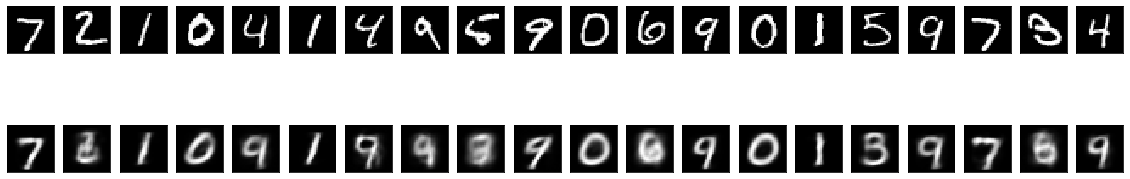

In [8]:
# 20 epochs

# tbc=TensorBoardColab()
# autoencoder.fit(x_train, x_train,
#                 epochs=20,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test),
#                 callbacks=[TensorBoardColabCallback(tbc)])

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


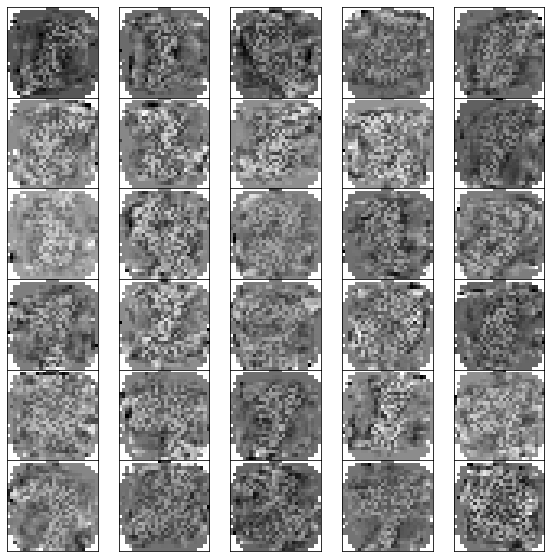

In [9]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [10]:
print(encoded_imgs.mean())

0.050448906


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3317 - val_loss: 0.8190
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3299 - val_loss: 0.7717
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3268 - val_loss: 0.8057
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3237 - val_loss: 0.8090
Epoch 5/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3293 - val_loss: 0.8320
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3265 - val_loss: 0.7614
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3229 - val_loss: 0.7614
Epoch 8/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3246 - val_loss: 0.7707
Epoch 9/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3236 - val_loss: 0.7581
Epoch

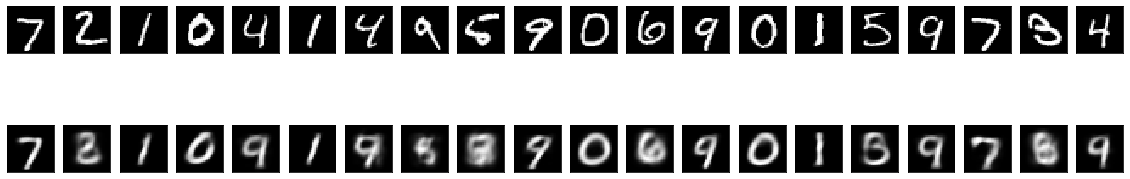

In [11]:
# 40 epochs
# tbc=TensorBoardColab()
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


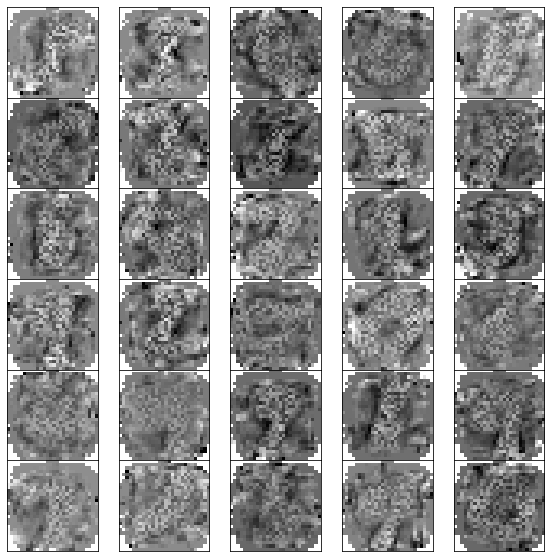

In [12]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [13]:
print(encoded_imgs.mean())

0.04822239


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3129 - val_loss: 0.7815
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3153 - val_loss: 0.7380
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3148 - val_loss: 0.7668
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2996 - val_loss: 0.7509
Epoch 5/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3116 - val_loss: 0.7750
Epoch 6/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3072 - val_loss: 0.7802
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2992 - val_loss: 0.7271
Epoch 8/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3100 - val_loss: 0.7726
Epoch 9/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3100 - val_loss: 0.7889
Epoch

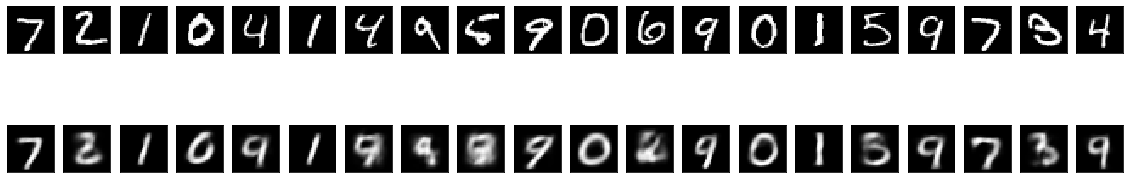

In [14]:
# 60 epochs
# tbc=TensorBoardColab()
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


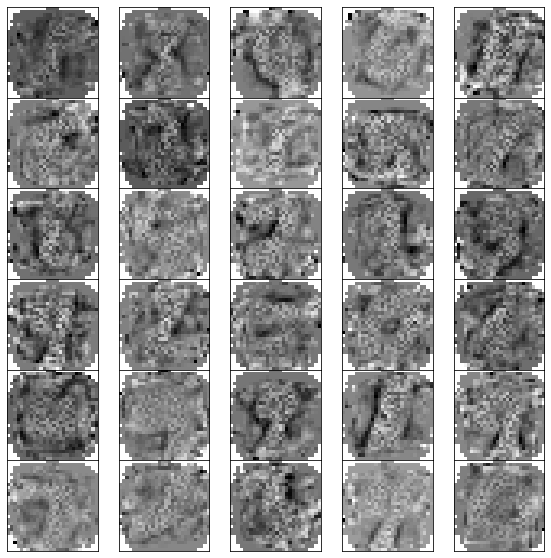

In [15]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [16]:
print(encoded_imgs.mean())

0.04879717


In [0]:
# # 200+ epochs
# # tbc=TensorBoardColab()
# autoencoder.fit(x_train, x_train,
#                 epochs=200,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

# # encode and decode some digits
# # note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

# n = 20 # how many digits we will display
# fig = plt.figure(figsize=(20, 4))
# for i in range(n):
#     # display original
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(decoded_imgs[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [0]:
# weights = autoencoder.layers[1].get_weights()

# theta = np.array(weights[0]).T
# norm_theta = np.linalg.norm(theta, axis=0)

# theta = theta / norm_theta

# plt.figure(figsize=(10,10))
# for i in range(30):
#     ax = plt.subplot(6, 5, i + 1)
#     plt.imshow(theta[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
#     ax.set_aspect('equal')

# plt.subplots_adjust(hspace=0, wspace=0)
# plt.show()

In [0]:
# print(encoded_imgs.mean())

In [0]:
(_, _), (x_test_noisy, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
# x_train = x_train.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

noise = np.random.normal(loc=0, scale=1, size=x_test_noisy.shape)
x_test_noisy = x_test_noisy + noise
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

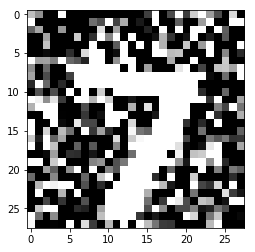

In [21]:
fig = plt.figure()
plt.imshow(x_test_noisy[0].reshape(28, 28))
plt.gray()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3037 - val_loss: 0.7515
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2960 - val_loss: 0.6977
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2918 - val_loss: 0.6673
Epoch 4/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.2889 - val_loss: 0.7379
Epoch 5/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.3007 - val_loss: 0.8425
Epoch 6/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.2988 - val_loss: 0.7599
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.2906 - val_loss: 0.7103
Epoch 8/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2987 - val_loss: 0.8614
Epoch 9/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.2974 - val_loss: 0.6719
Epoch

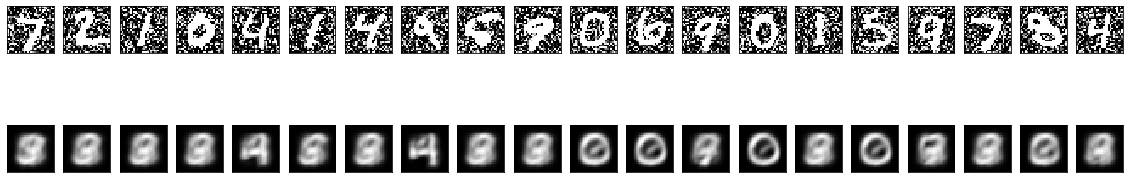

In [22]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()